In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
def logistic_function(x):
    import numpy as np
    return 1 / (1 + np.exp(-x))
def test_logistic_function():
    x_scalar = 0
    assert round(logistic_function(x_scalar),3)==0.5
    x_pos = 2
    assert round(logistic_function(x_pos),3)==round(1/(1+np.exp(-2)),3)
    x_neg = -3
    assert round(logistic_function(x_neg),3)==round(1/(1+np.exp(3)),3)
    x_array = np.array([0,2,-3])
    expected = np.array([0.5,0.881,0.047])
    assert np.all(np.round(logistic_function(x_array),3)==expected)
    print("Sigmoid: All tests passed!")

test_logistic_function()


Sigmoid: All tests passed!


In [3]:
def log_loss(y_true, y_pred):
    import numpy as np
    y_pred = np.clip(y_pred,1e-10,1-1e-10)
    return -(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
def test_log_loss():
    import numpy as np
    assert np.isclose(log_loss(1,1),0)
    assert np.isclose(log_loss(0,0),0)
    assert np.isclose(log_loss(1,0.8), -(np.log(0.8)))
    assert np.isclose(log_loss(0,0.2), -(np.log(0.8)))
    print("Log loss: All tests passed!")

test_log_loss()


Log loss: All tests passed!


In [5]:
def cost_function(y_true, y_pred):
    n = len(y_true)
    loss_vec = log_loss(y_true, y_pred)
    return np.sum(loss_vec)/n
def test_cost_function():
    y_true = np.array([1,0,1])
    y_pred = np.array([0.9,0.1,0.8])
    expected = (-(np.log(0.9)) - (np.log(0.9)) - (np.log(0.8)))/3
    assert np.isclose(cost_function(y_true,y_pred),expected)
    print("Cost function: Test passed!")

test_cost_function()


Cost function: Test passed!


In [7]:
def costfunction_logreg(X, y, w, b):
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)
    return cost_function(y, y_pred)
def compute_gradient(X, y, w, b):
    n, d = X.shape
    z = np.dot(X, w) + b
    y_pred = logistic_function(z)

    error = y_pred - y
    grad_w = np.dot(X.T, error) / n
    grad_b = np.sum(error) / n
    return grad_w, grad_b
X = np.array([[10,20],[-10,10]])
y = np.array([1,0])
w = np.array([0.5,1.5])
b = 1
grad_w, grad_b = compute_gradient(X,y,w,b)
print("Gradient test passed.")


Gradient test passed.


Gradient Descent: Test passed!


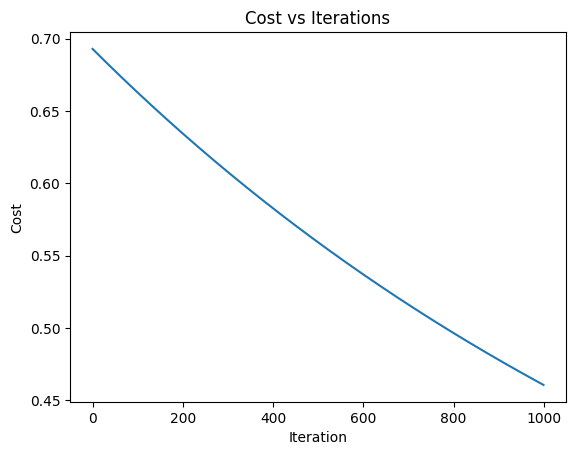

In [9]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False):
    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append((w.copy(),b))

        if show_cost and i % 1000 == 0:
            print(f"Iter {i} | Cost={cost}")

    return w, b, cost_history, params_history
X_test = np.array([[0.1,0.2],[-0.1,0.1]])
y_test = np.array([1,0])
w = np.zeros(2)
b = 0
w_out,b_out,cost_history,_ = gradient_descent(X_test,y_test,w,b,0.1,1000)
assert cost_history[-1] < cost_history[0]
print("Gradient Descent: Test passed!")
plt.plot(cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()



In [10]:
def prediction(X, w, b, threshold=0.5):
    y_prob = logistic_function(np.dot(X, w) + b)
    return (y_prob >= threshold).astype(int)
X_test = np.array([[0.5,1],[1.5,-0.5],[-0.5,-1]])
w_test = np.array([1,-1])
b_test = 0
expected = np.array([0,1,1])
assert np.array_equal(prediction(X_test,w_test,b_test),expected)
print("Prediction: Test passed!")


Prediction: Test passed!


In [11]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true==1)&(y_pred==1))
    TN = np.sum((y_true==0)&(y_pred==0))
    FP = np.sum((y_true==0)&(y_pred==1))
    FN = np.sum((y_true==1)&(y_pred==0))

    precision = TP/(TP+FP) if (TP+FP)>0 else 0
    recall    = TP/(TP+FN) if (TP+FN)>0 else 0
    f1        = 2*precision*recall/(precision+recall) if (precision+recall)>0 else 0

    return {
        "confusion_matrix":np.array([[TN,FP],[FN,TP]]),
        "precision":precision,
        "recall":recall,
        "f1_score":f1
    }


In [12]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url,names=columns)

# Replace zeros in certain medical columns
cols_clean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_clean:
    data[c] = data[c].replace(0, data[c].median())

X = data.iloc[:,:-1].values
y = data["Outcome"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

w = np.zeros(X_train.shape[1])
b = 0

w,b,cost_hist,_ = gradient_descent(X_train,y_train,w,b,alpha=0.1,n_iter=5000)

y_pred = prediction(X_test,w,b)
metrics = evaluate_classification(y_test,y_pred)
metrics


{'confusion_matrix': array([[82, 17],
        [19, 36]]),
 'precision': np.float64(0.6792452830188679),
 'recall': np.float64(0.6545454545454545),
 'f1_score': np.float64(0.6666666666666666)}